In [21]:
import numpy as np

In [26]:
data=np.array(20000).resize(10000,2)
with open("/Users/mohit.k.bansal/Downloads/datainput.txt", 'r') as datafile_id:
    data=np.loadtxt(datafile_id)
    
datafile_id.close()

In [23]:
print(data)

[[0.84092592 0.04995075]
 [0.34516321 0.90097939]
 [0.27783093 0.58115949]
 ...
 [0.72973801 0.24156816]
 [0.60815725 0.52737621]
 [0.29838233 0.53867862]]


In [24]:
xx=data[:,0]
yy=data[:,1]

In [25]:
from matplotlib import pyplot as plt

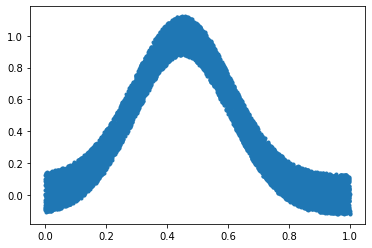

In [9]:
plt.plot(xx,yy,'.')

In [10]:
z = np.polyfit(xx, yy, 10)

In [11]:
p = np.poly1d(z)

In [12]:
#xp = np.linspace(0, 1, 100)
xin=data[:,0]
yin=data[:,1]
idd=np.argsort(xin)
xin=xin[idd]
yin=yin[idd]

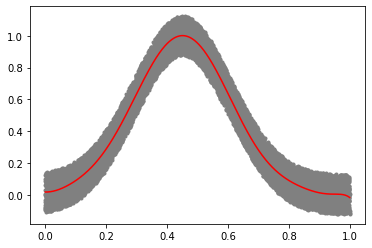

In [13]:
plt.plot(xin,yin,'.',color='gray')
#xin=np.sort(xx)
plt.plot(xin,p(xin),color='red')

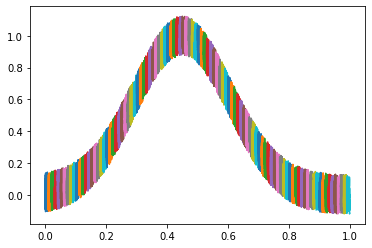

In [14]:
Ngroup=100
stats=np.zeros((100,6))
step=1./Ngroup
for group in np.arange(Ngroup):
    lb=step*group
    ub=step*(group+1)
    id_xrange=np.where( (xin >= lb) & (xin < ub ))
    xgroup = xin[id_xrange]
    ygroup = yin[id_xrange]
    plt.plot(xgroup,ygroup)
    ymean=np.mean(ygroup)
    xmean=np.mean(xgroup)
    ymedian=np.median(ygroup)
    yvar=np.sqrt(np.var(ygroup)) # /np.size(ygroup)) 
    stats[group,0]=np.size(ygroup)
    stats[group,1]=0.5*(lb+ub)
    stats[group,2]=xmean
    stats[group,3]=ymean
    stats[group,4]=ymedian
    stats[group,5]=yvar
    


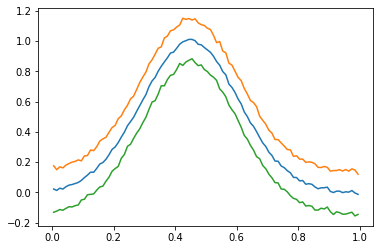

In [15]:
plt.plot(stats[:,1],stats[:,3])
plt.plot(stats[:,1],stats[:,3]+2.* stats[:,5])
plt.plot(stats[:,1],stats[:,3]-2.* stats[:,5])

In [16]:
zup = np.polyfit(stats[:,1], stats[:,3]+2.* stats[:,5] , 10)
pup = np.poly1d(zup)
zdn = np.polyfit(stats[:,1], stats[:,3]-2.* stats[:,5] , 10)
pdn = np.poly1d(zdn)

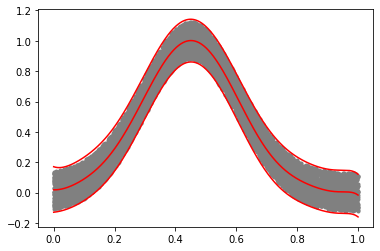

In [17]:
plt.plot(xin,yin,'.',color='gray')
#xin=np.sort(xx)
plt.plot(xin,p(xin),color='red')
plt.plot(xin,pup(xin),color='red')
plt.plot(xin,pdn(xin),color='red')

In [18]:
xinput=0.4
print(p(xinput),pup(xinput)-p(xinput),p(xinput)-pdn(xinput))

0.9507177315213723 0.14298620058311806 0.14273904073696964


In [19]:
xinput=0.4
y_estimate=p(xinput)
yupper_estimate=pup(xinput)-p(xinput)
ylower_estimate=p(xinput)-pdn(xinput)
print("%.2f" % y_estimate, "(+", "%.2f"% yupper_estimate, "-" ,"%.2f"% ylower_estimate, ")")

0.95 (+ 0.14 - 0.14 )


In [20]:
xinput=0.2
y_estimate=p(xinput)
yupper_estimate=pup(xinput)-p(xinput)
ylower_estimate=p(xinput)-pdn(xinput)
print("%.2f" % y_estimate, "(+", "%.2f"% yupper_estimate, "-" ,"%.2f"% ylower_estimate, ")")

0.29 (+ 0.15 - 0.15 )
